In [20]:
from plotnine import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("accepted_only_data.csv")

In [4]:
df.head()

,Unnamed: 0,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,emp_title,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate
0,0,3600.0,Debt consolidation,675,679,5.91,190xx,PA,10+ years,leadman,3600.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,13.99
1,1,24700.0,Business,715,719,16.06,577xx,SD,10+ years,Engineer,24700.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,11.99
2,2,35000.0,Debt consolidation,785,789,17.06,076xx,NJ,10+ years,Information Systems Officer,35000.0,N,MORTGAGE,Current,Individual,Dec-2015,1,1,14.85
3,3,10400.0,Major purchase,695,699,25.37,174xx,PA,3 years,Contract Specialist,10400.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,22.45
4,4,11950.0,Debt consolidation,690,694,10.20,300xx,GA,4 years,Veterinary Tecnician,11950.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,13.44


In [5]:
df.isnull().sum()

Unnamed: 0          0
loan_amnt           0
title               0
fico_range_low      0
fico_range_high     0
dti                 0
zip_code            0
addr_state          0
emp_length          0
emp_title           0
funded_amnt         0
hardship_flag       0
home_ownership      0
loan_status         0
application_type    0
issue_d             0
policy_code         0
Applicant_Result    0
int_rate            0
dtype: int64

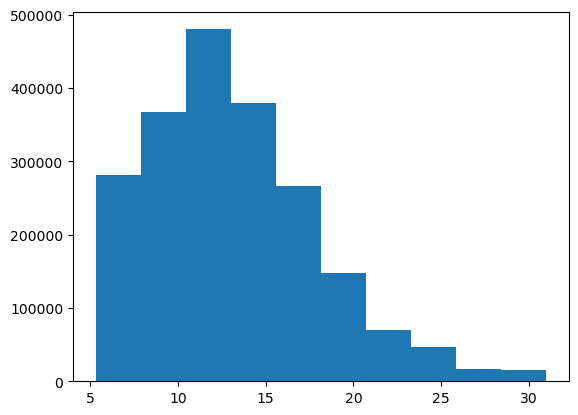

In [6]:
plt.hist(df['int_rate'])
plt.show()

One of the most normal looking histograms so far! That is probably because the LendingClub company is probably inputting these values.

In [7]:
df['fico_range_low'].describe()

count    2.072705e+06
mean     6.984002e+02
std      3.271810e+01
min      6.100000e+02
25%      6.750000e+02
50%      6.900000e+02
75%      7.150000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

Create categories based on low fico score range

In [8]:
fico_fair_df = df[(df['fico_range_low'] >= 580) & (df['fico_range_low'] <= 669)]
fico_good_df = df[(df['fico_range_low'] >= 670) & (df['fico_range_low'] <= 739)]
fico_very_good_df = df[(df['fico_range_low'] >= 740) & (df['fico_range_low'] <= 799)]
fico_exceptional_df = df[(df['fico_range_low'] >= 800) & (df['fico_range_low'] <= 850)]

In [9]:
fico_fair_df.reset_index(inplace=True)
fico_good_df.reset_index(inplace=True)
fico_very_good_df.reset_index(inplace=True)
fico_exceptional_df.reset_index(inplace=True)

In [10]:
fico_fair_df['fico_category'] = "Fair"
fico_good_df['fico_category'] = "Good"
fico_very_good_df['fico_category'] = "Very Good"
fico_exceptional_df['fico_category'] = "Exceptional"

C:\Users\orteg\AppData\Local\Temp\ipykernel_43792\806911634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\orteg\AppData\Local\Temp\ipykernel_43792\806911634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\orteg\AppData\Local\Temp\ipykernel_43792\806911634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [11]:
new_df = pd.concat([fico_fair_df, fico_good_df, fico_very_good_df, fico_exceptional_df], axis=0)

In [12]:
new_df.head()

,index,Unnamed: 0,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,...,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate,fico_category
0,11,11,18000.0,Debt consolidation,665,669,9.39,916xx,CA,7 years,...,18000.0,N,RENT,Charged Off,Individual,Dec-2015,1,1,19.48,Fair
1,21,21,5000.0,Credit card refinancing,665,669,12.70,214xx,MD,2 years,...,5000.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,13.44,Fair
2,43,43,8800.0,Credit card refinancing,665,669,5.18,493xx,MI,10+ years,...,8800.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,9.80,Fair
3,47,47,23850.0,Debt consolidation,665,669,24.71,231xx,VA,10+ years,...,23850.0,N,OWN,Current,Individual,Dec-2015,1,1,17.27,Fair
4,64,64,19000.0,Credit card refinancing,665,669,13.09,112xx,NY,9 years,...,19000.0,N,OWN,Fully Paid,Individual,Dec-2015,1,1,14.85,Fair


Since the interest rate can depend upon features outside of the applicant, I will focus on taking snippets from certain times.

In [13]:
new_df[['month', 'year']] = new_df['issue_d'].str.split("-", expand=True)

In [14]:
new_df['issue_d'] = pd.to_datetime(new_df['issue_d'])

In [15]:
new_df.head()

,index,Unnamed: 0,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,...,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate,fico_category,month,year
0,11,11,18000.0,Debt consolidation,665,669,9.39,916xx,CA,7 years,...,RENT,Charged Off,Individual,2015-12-01,1,1,19.48,Fair,Dec,2015
1,21,21,5000.0,Credit card refinancing,665,669,12.70,214xx,MD,2 years,...,RENT,Fully Paid,Individual,2015-12-01,1,1,13.44,Fair,Dec,2015
2,43,43,8800.0,Credit card refinancing,665,669,5.18,493xx,MI,10+ years,...,MORTGAGE,Fully Paid,Individual,2015-12-01,1,1,9.80,Fair,Dec,2015
3,47,47,23850.0,Debt consolidation,665,669,24.71,231xx,VA,10+ years,...,OWN,Current,Individual,2015-12-01,1,1,17.27,Fair,Dec,2015
4,64,64,19000.0,Credit card refinancing,665,669,13.09,112xx,NY,9 years,...,OWN,Fully Paid,Individual,2015-12-01,1,1,14.85,Fair,Dec,2015


In [91]:
data_two = new_df[new_df['year'] == "2018"]

In [92]:
grouped_two = data_two.groupby(['issue_d', 'fico_category'])['int_rate'].median()

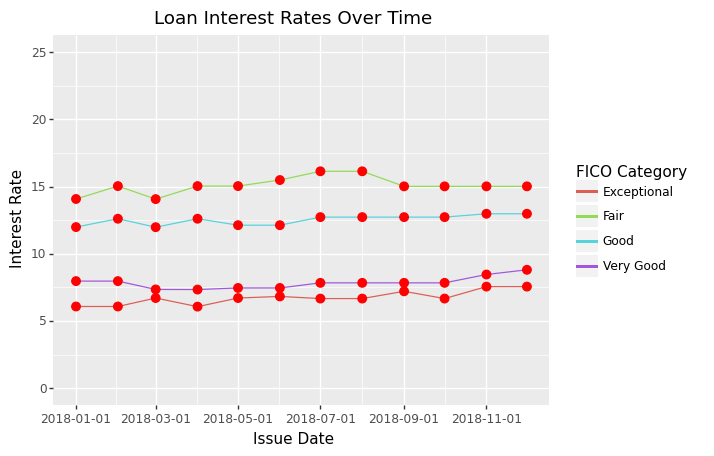

<ggplot: (193620160121)>

In [93]:
(ggplot(grouped_two.reset_index(), aes(x='issue_d', y='int_rate', color='fico_category')) + geom_line() + geom_point(color="red", size=3) + ylim(0,25) + xlab("Issue Date") + ylab("Interest Rate") + labs(color="FICO Category", title="Loan Interest Rates Over Time"))